In [13]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
np.random.seed(0)

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [15]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"


In [16]:
num_of_samples = []
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


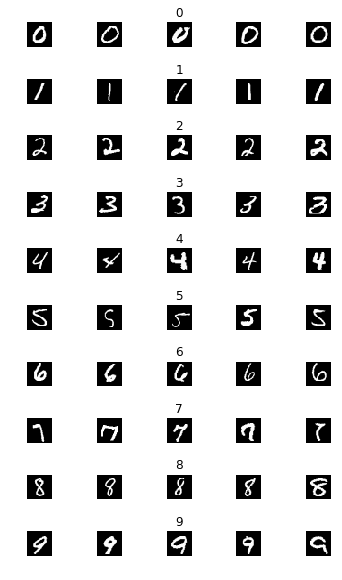

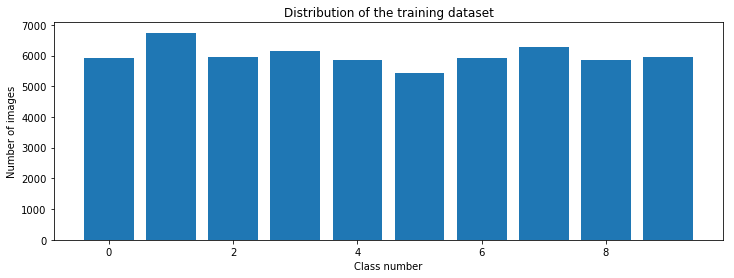

In [17]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255 
X_test = X_test/255
 
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [18]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 23us/step - loss: 0.6397 - acc: 0.8034 - val_loss: 0.3189 - val_acc: 0.9078
Epoch 2/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.3786 - acc: 0.8916 - val_loss: 0.2919 - val_acc: 0.9157
Epoch 3/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.3397 - acc: 0.9015 - val_loss: 0.2794 - val_acc: 0.9160
Epoch 4/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.3267 - acc: 0.9051 - val_loss: 0.2600 - val_acc: 0.9223
Epoch 5/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.3175 - acc: 0.9069 - val_loss: 0.2767 - val_acc: 0.9157
Epoch 6/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.3080 - acc: 0.9104 - val_loss: 0.2627 - val_acc: 0.9210
Epoch 7/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.3045 - acc: 0.9101 - val_loss: 0.2738 - val_acc:

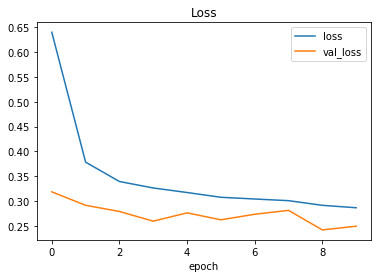

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

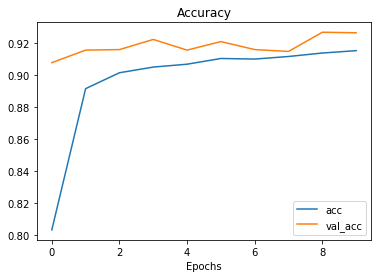

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend(['acc', 'val_acc'])
plt.show()

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score :: ', score[0])
print('Test accuracy:: ', score[1])

<class 'list'>
Test score ::  0.3155507170945406
Test accuracy::  0.9072
